<a href="https://colab.research.google.com/github/Dhoulnoun/fairuz-ML-project/blob/master/fairuz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's frame the problem

• Is it Supervised, Unsupervised, or Reinforcement Learning?

  It's Supervised because each instance has a corresponding target

• Is it a Classification task, a Regression task, or something else?

  It's a Classification task because our targets are categorical

• Should you use batch learning or online learning techniques?

   We should use batch learning because our dataset is not really huge and is not a real-time stream data


In [2]:
import pandas as pd
from scipy.io import arff

arff_file = arff.loadarff('/content/fairuz.arff')
df = pd.DataFrame(arff_file[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      45211 non-null  float64
 1   V2      45211 non-null  object 
 2   V3      45211 non-null  object 
 3   V4      45211 non-null  object 
 4   V5      45211 non-null  object 
 5   V6      45211 non-null  float64
 6   V7      45211 non-null  object 
 7   V8      45211 non-null  object 
 8   V9      45211 non-null  object 
 9   V10     45211 non-null  float64
 10  V11     45211 non-null  object 
 11  V12     45211 non-null  float64
 12  V13     45211 non-null  float64
 13  V14     45211 non-null  float64
 14  V15     45211 non-null  float64
 15  V16     45211 non-null  object 
 16  Class   45211 non-null  object 
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


45211 entries
17 features

In [ ]:
df.describe()

,V1,V6,V10,V12,V13,V14,V15
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Commentaire sur la répartition des features numériques:
  **TODO**


In [ ]:
df['V2'].value_counts()

,count
V2,
b'blue-collar',9732
b'management',9458
b'technician',7597
b'admin.',5171
b'services',4154
b'retired',2264
b'self-employed',1579
b'entrepreneur',1487
b'unemployed',1303


In [ ]:
df['V3'].value_counts()

,count
V3,
b'married',27214
b'single',12790
b'divorced',5207


In [ ]:
df['V4'].value_counts()

,count
V4,
b'secondary',23202
b'tertiary',13301
b'primary',6851
b'unknown',1857


In [ ]:
df['V5'].value_counts()

,count
V5,
b'no',44396
b'yes',815


In [ ]:
df['V7'].value_counts()

,count
V7,
b'yes',25130
b'no',20081


In [ ]:
df['V8'].value_counts()

,count
V8,
b'no',37967
b'yes',7244


In [ ]:
df['V9'].value_counts()

,count
V9,
b'cellular',29285
b'unknown',13020
b'telephone',2906


In [ ]:
df['V11'].value_counts()

,count
V11,
b'may',13766
b'jul',6895
b'aug',6247
b'jun',5341
b'nov',3970
b'apr',2932
b'feb',2649
b'jan',1403
b'oct',738


In [ ]:
df['V16'].value_counts()

,count
V16,
b'unknown',36959
b'failure',4901
b'other',1840
b'success',1511


Toutes les features de catégorie semblent équilibrement répartie. Aucun traitement ne semble nécessaire.

Analysons la matrice de corrélation de nos paires de features

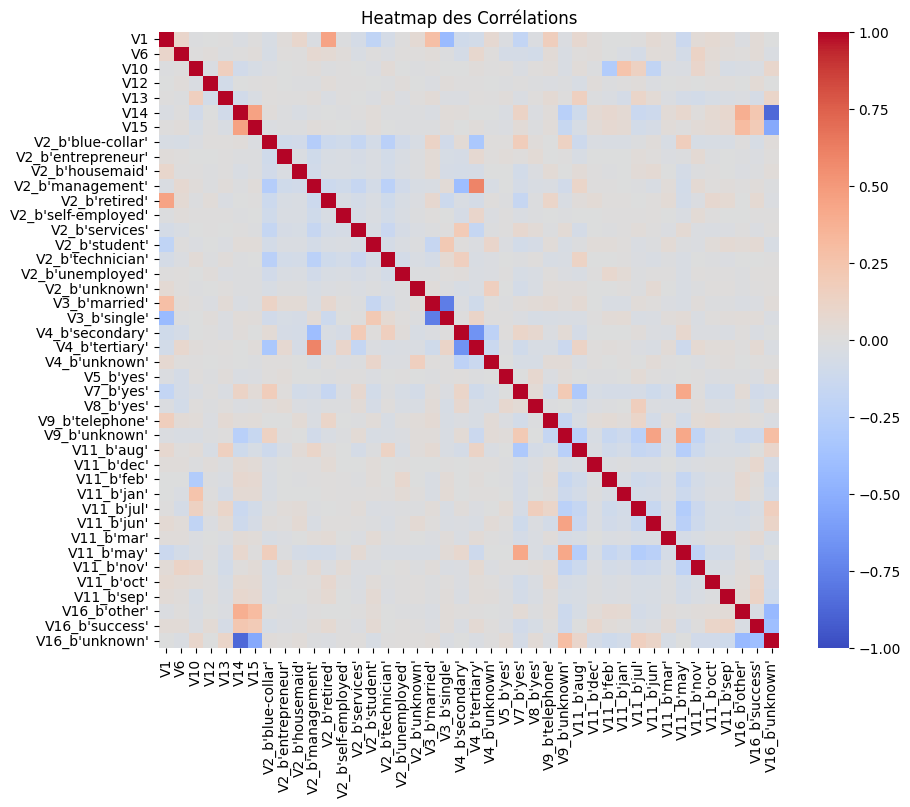

V14 - V16_b'unknown' : Corrélation = -0.87
V16_b'unknown' - V14 : Corrélation = -0.87


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Identifier les colonnes catégoriques
X = df.drop('Class', axis=1)  # Suppression de la colonne cible (target)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Appliquer One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' pour éviter la multicolinéarité
encoded_features = encoder.fit_transform(X[categorical_columns])

# Convertir en DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Remplacer les colonnes catégoriques dans X par leurs versions encodées
X_encoded = X.drop(columns=categorical_columns)  # Supprimer les colonnes catégoriques d'origine
X_encoded = pd.concat([X_encoded.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Calculer la matrice de corrélation
correlation_matrix = X_encoded.corr()

# Visualiser la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap des Corrélations")
plt.show()

# Trouver les paires fortement corrélées
threshold = 0.8
correlated_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if (correlation_matrix.loc[col1, col2] > threshold or correlation_matrix.loc[col1, col2] < -threshold)
    and col1 != col2
]
for pair in correlated_pairs:
    print(f"{pair[0]} - {pair[1]} : Corrélation = {pair[2]:.2f}")

Maintenant, analysons la répartition de valeur de notre target

In [ ]:
df['Class'].value_counts()

,count
Class,
b'1',39922
b'2',5289


On voit une répartition très largement en faveur de la valeur '1'.
Pour palier à ce problème nous avons plusieurs types de solutions.

*   Rerépartir les données par du sur-échantillonnage de la classe minoritaire (SMOTE) ou sous-échantillonnage de la classe majoritaire.
*   Utilisez des modèles qui sont efficaces même avec un déséquilibre comme random forest par exemple
*   Collectez des données supplémentaires (Impossible dans notre cas)
*   Lors de l’entraînement, appliquez des poids inversés proportionnels à la fréquence des classes pour équilibrer leur impact sur la fonction de perte.






**Sur-échantillonnage de la classe '2' minoritaire**

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Séparer les features et la target
X = df.drop('Class', axis=1)
y = df['Class']


# Identifier les colonnes catégoriques
categorical_columns = X.select_dtypes(include=['object']).columns

# Appliquer One-Hot Encoding aux colonnes catégoriques
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' pour éviter la multicolinéarité
encoded_features = encoder.fit_transform(X[categorical_columns])

# Convertir les données encodées en DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Supprimer les colonnes originales catégoriques et les remplacer par les colonnes encodées
X = X.drop(columns=categorical_columns)
X = pd.concat([X.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


# Convertir les labels en format numérique si nécessaire
y = y.astype('int')

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Reconstruire un DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# Vérification
print(df_resampled['Class'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class
1    39922
2    39922
Name: count, dtype: int64


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Diviser les features et la target
X = df_resampled.drop('Class', axis=1)  # Utiliser le dataset réséchantillonné
y = df_resampled['Class']

# Identifier les colonnes numériques uniquement (les catégoriques sont déjà encodées)
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Définir la transformation pour les colonnes numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns)  # Standardiser les colonnes numériques uniquement
    ],
    remainder='passthrough'  # Laisser les autres colonnes (déjà encodées) inchangées
)

# Créer une pipeline avec le préprocesseur et RandomForest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, n_estimators=100))
])

# Entraîner la pipeline
pipeline.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[7593  392]
 [ 612 7372]]

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.95      0.94      7985
           2       0.95      0.92      0.94      7984

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro')
print("Cross-validated F1-scores:", scores)
print("Mean F1-score:", scores.mean())

Cross-validated F1-scores: [0.69125186 0.88828355 0.84426713 0.75497936 0.66133116]
Mean F1-score: 0.7680226094218794


On vérifie les répartitions dans chaque pli

In [ ]:
for train_idx, test_idx in cv.split(X, y):
    print("Train class distribution:", y.iloc[train_idx].value_counts())
    print("Test class distribution:", y.iloc[test_idx].value_counts())

Train class distribution: Class
2    31938
1    31937
Name: count, dtype: int64
Test class distribution: Class
1    7985
2    7984
Name: count, dtype: int64
Train class distribution: Class
2    31938
1    31937
Name: count, dtype: int64
Test class distribution: Class
1    7985
2    7984
Name: count, dtype: int64
Train class distribution: Class
1    31938
2    31937
Name: count, dtype: int64
Test class distribution: Class
2    7985
1    7984
Name: count, dtype: int64
Train class distribution: Class
1    31938
2    31937
Name: count, dtype: int64
Test class distribution: Class
2    7985
1    7984
Name: count, dtype: int64
Train class distribution: Class
1    31938
2    31938
Name: count, dtype: int64
Test class distribution: Class
1    7984
2    7984
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [10, 15, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Utiliser GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X, y)

# Meilleurs paramètres
print("Best Parameters:", grid_search.best_params_)

# Évaluation avec le meilleur modèle
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1_macro')
print("Optimized Cross-Validation F1-scores:", cv_scores)
print("Mean F1-score after optimization:", cv_scores.mean())

KeyboardInterrupt: 

Dataset non équillibré ci dessous

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Diviser les features et la target
X = df.drop('Class', axis=1)
y = df['Class']

# Identifier les colonnes catégoriques et numériques
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Définir les transformations pour chaque type de données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),       # Standardiser les colonnes numériques
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # Encodage One-Hot pour les colonnes catégoriques
    ]
)

# Créer une pipeline avec le préprocesseur et un modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Entraîner la pipeline
pipeline.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[7770  215]
 [ 649  409]]

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.97      0.95      7985
           2       0.66      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



Essayons un autre algorithme

In [9]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


# Diviser les features et la target
X = df_resampled.drop('Class', axis=1)  # Utiliser le dataset réséchantillonné
y = df_resampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 31938, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10652
[LightGBM] [Info] Number of data points in the train set: 63875, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
Confusion Matrix:
 [[7688  297]
 [ 508 7476]]

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.96      0.95      7985
           2       0.96      0.94      0.95      7984

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969



Essayons maintenant la validation croisée

In [10]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Diviser les features et la target
X = df_resampled.drop('Class', axis=1)  # Utiliser le dataset réséchantillonné
y = df_resampled['Class']

# Définir le modèle
model = LGBMClassifier(random_state=42)

# Définir une validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Utiliser le F1-macro comme métrique pour des classes éventuellement déséquilibrées
f1_macro = make_scorer(f1_score, average='macro')

# Calculer les scores de validation croisée
cv_scores = cross_val_score(model, X, y, cv=cv, scoring=f1_macro)

# Afficher les résultats
print("Cross-Validation F1-scores:", cv_scores)
print("Mean F1-score:", cv_scores.mean())
print("Standard Deviation of F1-scores:", cv_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 31938, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10656
[LightGBM] [Info] Number of data points in the train set: 63875, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 31938, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10657
[LightGBM] [Info] Number of data points in the train set: 63875, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 31937, number of negative: 31938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10656
[LightGBM] [Info] Number of data points in the train set: 63875, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 31937, number of negative: 31938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10657
[LightGBM] [Info] Number of data points in the train set: 63875, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000031
[LightGBM] [Info] Start training from score -0.000031


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 31938, number of negative: 31938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10653
[LightGBM] [Info] Number of data points in the train set: 63876, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Cross-Validation F1-scores: [0.94902156 0.94701257 0.94670248 0.95271363 0.94663605]
Mean F1-score: 0.9484172561308519
Standard Deviation of F1-scores: 0.0023199267219861847


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross-Validation F1-scores: [0.94902156 0.94701257 0.94670248 0.95271363 0.94663605]
Les résultats sont bien meilleurs